# The Perceptron

Based on a simple (the simplest) nerual net.

![http://i.stack.imgur.com/KUvpQ.png](http://i.stack.imgur.com/KUvpQ.png)


$h(x) = sign((\sum{w_ix_i}) - threshold)$

Can simplify by adding an artificial coordinate $x_0$ and $w_0$  where $x_0 = 1$ 

This makes it easy

$h(x) = sign(\sum{w_ix_i})$

or in vector notation

$h(x) = sign(w \cdot x)$



## So, how is this a learning system?

We need a learning algorithm

Supervised Learning requires a training set where we have some data and we know the answer.

1. Given a training set of $\vec x,\vec y$
2. Classify all of the points in $\vec x$
3. Pick a point $n$ from $\vec x$ that was misclassified
4. update the weight vector $\vec w$ using: $\vec w = \vec w + y_n \vec w_n$

Repeat 2 -- 4 until all points are classified correctly.  OR at some upper limit of iteration.


See https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/ for a nice writeup.

In [17]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set(color_codes=True)
import matplotlib.pyplot as plt

#ts = [np.array([1,5,10]), np.array([1,3,11]), np.array([1,7,10]), np.array([1,2,3]), np.array([1,6,2]),np.array([1,1,1])]
#cls = [1,1,1,-1,-1,-1]
ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9])]
cls = [1,1,1,-1]
w = np.array([1,1,1])


In [9]:

done = False
count = 0

while not done and count < 1000000:
    count += 1
    correct = []
    incorrect = []
    # first classify all points

    for ix,i in enumerate(ts):
        if np.sign(np.dot(i,w)) == cls[ix]:
            correct.append(ix)
        else:
            incorrect.append(ix)

    if len(incorrect) == 0:
        print("Done!",w)
        done = True
    else:
        p = random.randrange(len(incorrect))
        y = ts[incorrect[p]]
        w = w + y*cls[incorrect[p]]
        print(len(incorrect), w)

        




1 [ 0.   0.3  0.1]
1 [-1.  -0.4 -0.8]
3 [ 0.   0.1 -0.6]
3 [  1.00000000e+00   5.00000000e-01  -1.11022302e-16]
1 [ 0.  -0.2 -0.9]
3 [  1.00000000e+00   1.66533454e-16  -8.00000000e-01]
1 [ 0.  -0.7 -1.7]
3 [ 1.  -0.5 -1.6]
1 [ 2.  -0.1 -1. ]
1 [ 1.  -0.8 -1.9]
1 [ 2.  -0.4 -1.3]
1 [ 1.  -1.1 -2.2]
1 [ 2.  -0.7 -1.6]
1 [ 1.  -1.4 -2.5]
2 [ 2.  -0.9 -2.3]
Done! [ 2.  -0.9 -2.3]


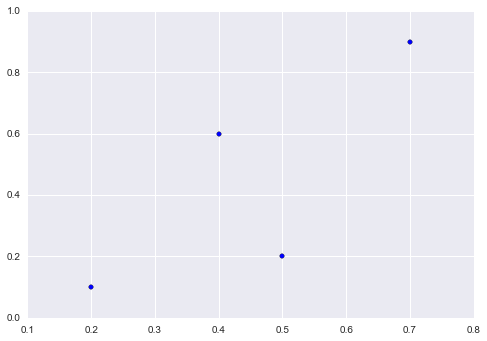

In [10]:
plt.scatter(list(map(lambda x: x[1],ts)),list(map(lambda x: x[2],ts)))

1 [ 0.   0.3  0.1]


None

1 [ 0.   0.3  0.1]
1 [-1.  -0.4 -0.8]
3 [ 0.  -0.2 -0.7]
3 [  1.00000000e+00   1.11022302e-16  -6.00000000e-01]
1 [ 0.  -0.7 -1.5]
3 [ 1.  -0.3 -0.9]
Done! [ 1.  -0.3 -0.9]


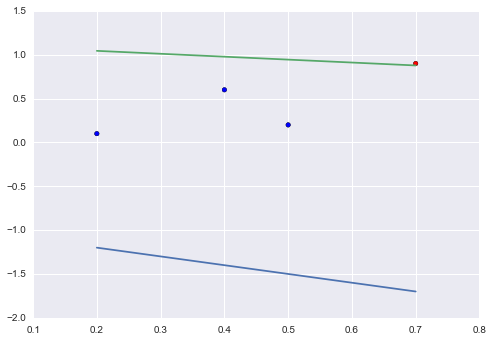

In [30]:
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets

class Perceptron:
    def __init__(self, ts, tc):
        self.training_set = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
        
    def classify(self, x):
        return np.sign(np.dot(x, self.weights))
    
    def learn(self, limit=10000):
        done = False
        count = 0
        bestWeights = self.weights
        leastWrong = len(self.training_set)

        while not done and count < limit:
            count += 1
            self.correct = []
            self.incorrect = []

            # first classify all points

            for ix,i in enumerate(self.training_set):
                if self.classify(i) == self.classes[ix]:
                    self.correct.append(ix)
                else:
                    self.incorrect.append(ix)

            if len(self.incorrect) == 0:
                print("Done!", self.weights)
                done = True
            else:
                if len(self.incorrect) < leastWrong:
                    leastWrong = len(self.incorrect)
                    bestWeights = self.weights
                p = random.randrange(len(self.incorrect))
                y = self.training_set[self.incorrect[p]]
                self.weights = self.weights + y*self.classes[self.incorrect[p]]
                print(len(self.incorrect), self.weights)
        if not done:
            self.weights = bestWeights
        self.plot()
        
        
    def plot(self):
        cols = []
        xvals = list(map(lambda x: x[1], self.training_set))
        cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals, list(map(lambda x: x[2], self.training_set)), c=cmap)
        slope, intcpt = -self.weights[1]/self.weights[2], -self.weights[0]/self.weights[2]
        xvals = np.linspace(min(xvals), max(xvals))
        plt.plot(xvals, slope*xvals+intcpt)
        
p = Perceptron(ts, cls)
interact(p.learn, limit=widgets.widget_int.IntSlider(min=0, max=10, step=1, value=1))

p.learn()

### Lets look at a classic dataset in machine learning.  The iris dataset

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Since we only can do a binary classification right now, lets look at setosa versus virginica


In [11]:
df = pd.read_csv('iris.csv',header=None)
df.columns = ['sepallen','sepalwidth','petallen','petalwidth','kind']

In [12]:
df.head()

,sepallen,sepalwidth,petallen,petalwidth,kind
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


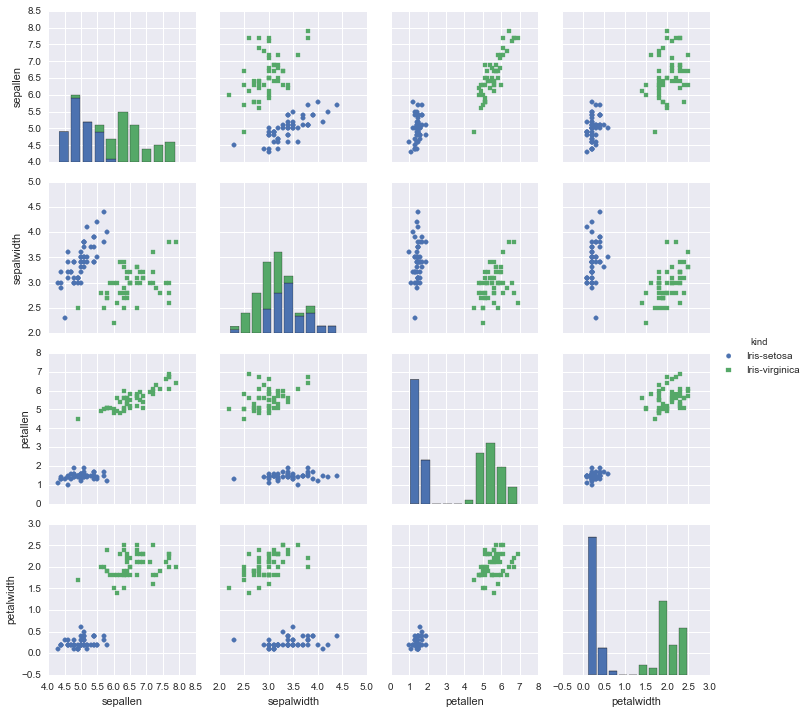

In [22]:
c = df[(df.kind == 'Iris-setosa') | (df.kind == 'Iris-virginica')]
sbn.pairplot(c[['sepallen','sepalwidth','petallen','petalwidth', 'kind']], hue='kind', markers=["o", "s"])

### Lets try

Conver this into something we can use with our simple perceptron learning algorithm and see if it works.


### Lets look at a more interesting dataset

Predicting the incidence of diabetes in the Pima Indian population  using the `pima-indians-diabetes.data` file.

The columns of the file are as follows:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)



In [42]:
df = pd.read_csv('../Data/pima-indians-diabetes.data',header=None)
df.columns = ['ntp','glucose','bp','tsft','insulin','bmi','dpf','age','class']

In [43]:
df.head()

,ntp,glucose,bp,tsft,insulin,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


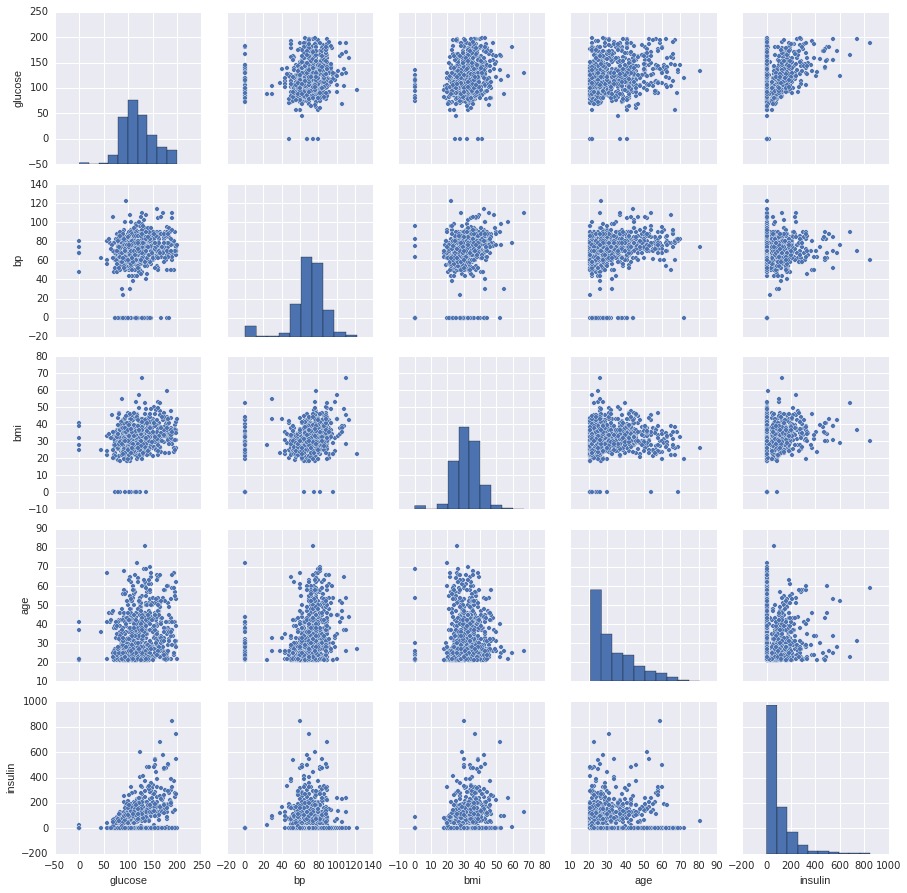

In [48]:
sbn.pairplot(df[['glucose','bp','bmi','age','insulin']])